<a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/3_Spatial_and_Temporal_Change/GY5021_11_Temporal_Change-Active_Remote_Sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F3_Spatial_and_Temporal_Change%2FGY5021_11_Temporal_Change-Active_Remote_Sensing.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

<img src="https://raw.githubusercontent.com/bamacgabhann/GY5021/2024/PD_logo.png" align=center alt="UL Geography logo"/>

# Temporal Change: Active Remote Sensing

In the *Introduction to Geospatial Data* Notebooks, we looked at vector data, where geospatial data is stored along with Point, Line, or Polygon coordinates. In the *Raster Geospatial Data* Notebooks, we then looked at how some geospatial data which varies across an area (like photographs, or temperature data) is not particularly suited for this vector format, but is much better used as raster data, where the data is stored alongside a *transform* which defines the coordinates of the corners of the dataset, and how the shape changes within that area. 

In the *Multi-band Raster Data* Notebook, we used some *Passive Remote Sensing* data to analyse a wildfire in Killarney National Park in 2021. This passive remote sensing data was collected by a multispectral satellite, which can see multiple infrared colours as well as visible light. The 'passive' part of the name refers to the fact that the instrument is not transmitting a signal - just receiving. The satellite taking the multispectral photograph isn't shining a light onto the Earth - it's taking advantage of the illumination of the Earth by the sun, simply measuring the sunlight reflected from the ground towards the sensor.

The other side of this coin is *Active Remote Sensing*, where the sensor *does* actively transmit a signal, and collects the signals which are reflected back to the sensor. Examples of active remote sensing are fairly common - even in nature, with bats using echolocation at night - making a sound and using the timing of the echoes to learn where objects are around it. We have discussed some active remote sensing already: in particular LiDAR, which is used to measure the topography of the ground surface, producing digital elevation models (DEMs) of topography.

We also discussed RADAR, which is commonly known for its use in aviation. Indeed, RADAR - an acronym for *RAdio Detection And Ranging* - was invented in the pre-WW2 period as a means of early warning of incoming hostile aircraft, with the first RADAR arrays being the *Chain Home* towers installed in 1937-1939 on the southern coast of England. In modern times, most civilian as well as military aircraft have on-board RADAR in order to locate both nearby aircraft. 

However, it's not just aircraft which can be detected by RADAR. The transmitted radio signals are electromagnetic waves, of the same kind as light and infrared, just with a longer wavelength of between 1mm and 100m (in contrast to infrared waves measured in micrometers (μm) or millionths of a metre, or visible light measured in nanometres (nm), billionths of a metre). The higher wavelength of RADAR means that the signals can reflect off different objects or features - including various weather patterns. Civilian airliner RADARs can detect weather, and weather radar ground stations provide essential data for weather forecasts, as frequently seen on TV weather updates. Met Eireann provides [access to weather radar data online](https://www.met.ie/latest-reports/recent-rainfall-radar/12-hour-rainfall-radar).

<img src="https://www.met.ie/images/radar/web17_radar15_202402141645.png" height="50" alt="Met Eireann weather radar map for Ireland (radar detection areas shown in light blue"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/737NG_Navigation_Display_with_weather_radar_showing._%285734080397%29.jpg/320px-737NG_Navigation_Display_with_weather_radar_showing._%285734080397%29.jpg" alt="Boeing 737NG cockpit weather radar">

Weather isn't the only relevant application of RADAR. We originally discussed RADAR in the *Single Band Raster Data* notebook as a comparison to LIDAR, for making digital elevation models of topography. We discussed how shorter X-band RADAR signals, with a wavelength around 3cm will be reflected by the top surface of forest canopies; while L-band RADAR signals, with a longer wavelength around around 24cm, are too big to be reflected by individual leaves and branches, and so pass through forest canopies to reflect off the ground below. 

<img src="https://detektia.com/en/wp-content/uploads/sites/3/what-is-sar-synthetic-aperture-radar.jpeg" align=center alt="RADAR bands"/>

Some RADAR data of this kind is collected by aircraft. An important consideration in airborne radar is that the spatial resolution of RADAR systems is not determined by the wavelength of the signal, but rather by the aperture size of the receiving antenna. This is a problem for airborne systems, as the size of the antenna is limited by the physical size of the aircraft or UAV. You can't install a 1km-long array on a light aircraft, such as the 16m-long Dornier 228. 

However, an aircraft has a huge advantage - it's moving. This means the antenna will not just receive reflected signals in a sngle position, but will be receiving signals over a distance as the aircraft is moving forward. These signals can be mathematically combined, turning a short actual aperture into a much longer *synthetic aperture*, meaning the spatial resolution of the data will be much higher.

Even so, there are significant limits to the ground area over which aircraft can collect RADAR data, whether normal or synthetic aperture. Aircraft are limited in speed, and fly at altitudes too low to observe more than a fraction of the Earth's curved surface. That's where satellites come in. Orbiting at altitudes around 700km, and travelling at speeds measured in thousands of kilometres per hour, *Synthetic Aperture RADAR*  or *SAR* satellites can map huge swathes of the Earth's surface in one go, mapping the entire surface of the planet in less than a fortnight - and again every fortnight for as long as they remain operational.

## Synthetic Aperture Radar satellite active remote sensing

As for multispectral satellite imagery, we can take a step back here, and think about everything which has to happen in order for a remote sensing instrument to receive data.

1. A source of energy emits that energy
2. That energy travels from the source to the target
3. The energy interacts in some way with the target
4. The energy travels from the target to the sensor
5. The sensor records the energy as data
6. The data is processed
7. The processed data is analysed

These are a little different for SAR than for the multispectral imagery we looked at before.

1. Source: the satellite
For SAR satellites, the source of energy is the satellite itself, transmitting radio waves at the ground. This isn't like the Sun, emitting energy over a broad spectrum - it's a single, specific signal. This means that unlike multispectral imagery, SAR doesn't have different colours.

However, not relying on the sun comes with one particular *huge* advantage. Since it doesn't rely on the Sun, it doesn't matter if it's day or night. SAR datat can be collected at any time of day, anywhere in the world.

2. Some of that energy travels to Earth.

Visible and infrared light are affected by travelling through the atmosphere. Some light is scattered (including blue light, which is why the sky is blue) or can be absorbed (such as Sentinel 2's Band 10). Even worse, it can be reflected off clouds - so you can't see anything on the ground with multispectral imagery on a bad weather day. Not so for SAR, which penetrates atmosphere and clouds, and so can be used regardless of weather conditions.

I'll skip a step here to note that the same thing will happen at:

4. Energy travels from the target to the sensor.

Multispectral satellites receive signals, and just record *what* is received. However, because SAR satellites are transmitting the signals themselves, they can also record *when* the signal was received - and compare that to when the signal was transmitted, to determine how long it took the signal to return. The speed od radio waves is the speed of light, which is fixed - and that means we can use time for the signal to return to calculate the distance to the ground. This is what allows SAR sensors to measure the topography of the ground surface.

5. The sensor records the energy as data

Receiving the signal over a distance as the satellite travels means the spatial resolution of the data is increased. Open SAR data can reach 5m in ground resolution, with some commercial SAR satellites claiming 1m ground resolution. The EU's Sentinel 1 satellites most commonly have data at a resolution of 5m x 20m.

6. The data is processed

SAR data needs significant processing, translating the received signals into an image of what's on the ground, and adding the correct geographic information. This is done before we get the data. Different levels of processing are possible. For Sentinel 1, Single Look Complex (SLC) data essentially puts the coordinates of the image corners in the right place, but doesn't do any corrections to the individual pixels. It's essentially the satellite's "line of sight" view. This is what you'd want if you're interested in trying to create a DEM, or look at changes in the ground surface e.g. after earthquakes or landslides. Ground Range Detected (GRD) data combines multiple SLC images collected in a burst, and transforms the data to project it onto the curved surface of the Earth using the WGS84 reference ellipsoid. The pixel sizes are corrected, with the pixel values recording the strength of the received signal. This is what you'd want if you're interested in comparing differences across the image, e.g. different kinds of land use. Radiometric Terrain Corrected (RTC) data uses a higher-resolution DEM to fully map the data onto the topography. Unless you're getting to a very high level of expertise in SAR, you won't be doing this processing yourself - just making sure to download the data that best suits what you want to do with it.

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*KYCKx8xbel-u_4b9TY3xNA.png">

7. The processed data is analysed

That's where you come in - if there's something you're interested in for which SAR can help.  

  
Like in multispectral data, the skipped step is crucial:

3. The energy interacts with the target.
This is the key step. Fo mutispectral data, I said there are essentially three things which can happen here.
    1. The energy can be *transmitted*, passing through the target completely.
    2. The energy can be *absorbed* by the target.
    3. The energy can be *reflected* by the target.
  
SAR is a little bit different. Absorption is not a significant factor, meaning we have just transmission through the feature or reflection to consider. This is essentially what we discussed for forest canopies above, how some RADAR signals can pass through tree canopies. This will then reach another target - in that case, the ground, reflecting off that instead.

In terms of reflection, SAR is very different to multispectral imagery. We're not talking about a situation where some colours will be reflected while others aren't: we only have one signal, so it's either reflected or it's not.  

There is one quirk, which is that RADAR waves can be either horizontal or vertical - a property called polarization.

<img src="https://satoms.com/wp-content/uploads/2017/11/Polarization.jpg">

Waves will generally be transmitted as *either* horizontal *or* vertical, not both. Sometimes, reflection will flip the signal - so you can transmit vertical, and receive both vertical and horizonal. Some surfaces tend to flip the signal more than others, so this can help somewhat with identifying or classifying objects or surfaces.

However, the biggest difference in reflection from multispectral imagery is the *direction* of reflection. With multispectral imagery, we're just receiving data which was reflected at the satellite. With SAR, we're receiving a signal which was transmitted from the satellite, and reflected back to the satellite. But not all of the reflected signal will be reflected back to the satellite - some of it will be reflected *away* from the satellite. This is even more significant because SAR radio waves are not transmitted down to the surface vertically, but at an angle. This means that where the signal is reflected off a flat surface, the entire signal will be reflected away from the satellite. Only rough surfaces will reflect signals back.

<img src="https://hyp3-docs.asf.alaska.edu/images/wavelength_vs_roughness.png">

Most of the land surface is rough. Vegetation, rocks, soils, even buildings - all will reflect some of the RADAR signal back to the satellite, enough to detect. However, there's one thing which *is* flat, and which covers a significant fraction of the surface: water.

## 1. Identifying water in SAR imagery

Here's a SAR image of the Athlone area, collected on 27 January.

In [1]:
# RUN THIS CELL FIRST IF ON COLAB:
#!pip install osmnx
#!pip install rasterio

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import osmnx as ox
import rasterio as rio
import rasterio.mask
from rasterio.plot import show
from rasterio.features import dataset_features, sieve
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [3]:
SAR_Athlone_2024_01_27 = rio.open('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/3_Spatial_and_Temporal_Change/sample_data/athlone/2024-01-27-18_23_Sentinel-1_IW_VV_decibel_gamma0.tiff')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


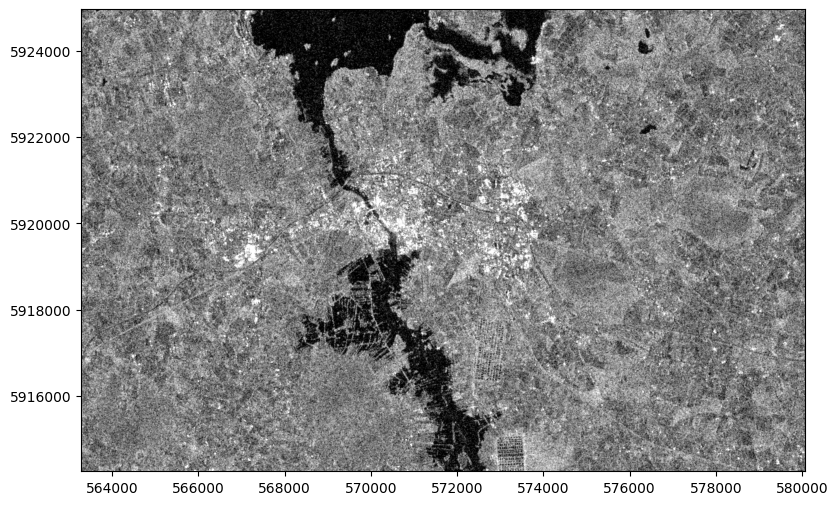

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.ticklabel_format(style='plain')
show(SAR_Athlone_2024_01_27, ax=ax, cmap="Greys")
plt.show()

You can see some differences across the land surface - the urban area of Athlone definitely shows up as brighter, there's some variation between different fields, and you caeven make out some roads. But all of those differences are completely overshadowed by the difference between the land surface and the waters of Lough Ree and the River Shannon.

Here, the black areas are areas of flat water, where the RADAR signal from the Sentinel 1 satellite was simply reflected away; while the greys of the rougher ground surface reflected some of the signal back to the satellite.

In the Multi Band Raster notebook, we used a threshold value to identify the areas of active fires. We can use exactly the same principle to identify the areas of water. We can set a low threshold value - anything with a higher reflected signal is land, anything with a lower value is water.

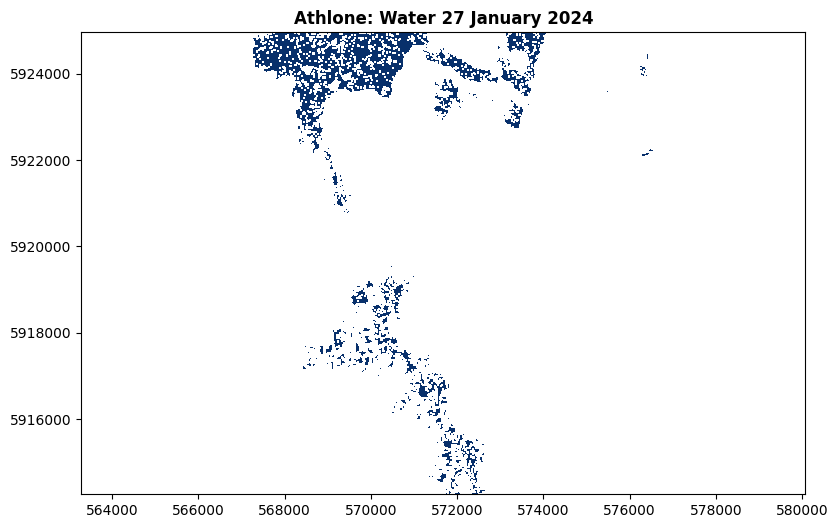

In [5]:
threshold = 0.2

water_Athlone_2024_01_27 = SAR_Athlone_2024_01_27.read(1)
water_Athlone_2024_01_27[water_Athlone_2024_01_27>threshold]=np.nan
water_Athlone_2024_01_27[water_Athlone_2024_01_27<threshold]=1

fig, ax = plt.subplots(figsize=(10, 6))

show(water_Athlone_2024_01_27, transform=SAR_Athlone_2024_01_27.transform, ax=ax, title='Athlone: Water 27 January 2024', cmap="Blues_r")

ax.ticklabel_format(style='plain')
plt.show()

Just like the fire shapes in the Multi Band Raster notebook, we can vectorise this:

In [6]:
water_meta = SAR_Athlone_2024_01_27.meta

with rio.open('./sample_data/2024-01-27-18_23_Sentinel-1_water_raster.tif', 'w', **water_meta) as dst:
    dst.write(water_Athlone_2024_01_27, 1)
    dst.set_band_description(1, 'water')

water_2024_01_27_raster = rio.open('./sample_data/2024-01-27-18_23_Sentinel-1_water_raster.tif')
water_2024_01_27_vector = dataset_features(water_2024_01_27_raster, bidx=1, band=True, as_mask=False, with_nodata=False, geographic=False)
water_2024_01_27_df_vector = gpd.GeoDataFrame.from_features(water_2024_01_27_vector,crs=32629)
water_2024_01_27_df_vector = water_2024_01_27_df_vector[water_2024_01_27_df_vector['val']==1.0]
water_2024_01_27_df_vector = water_2024_01_27_df_vector.drop(columns=['val', 'filename'])
water_2024_01_27_df_vector['Water 27 January 2024']=True
water_2024_01_27_df_vector.to_file('./sample_data/2024-01-27-18_23_Sentinel-1_water_vector.gpkg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


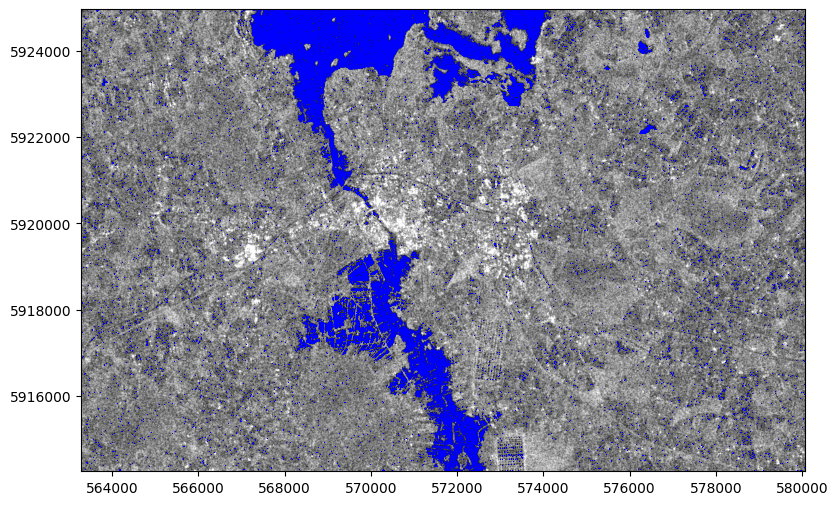

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

show(SAR_Athlone_2024_01_27, ax=ax, cmap="Greys")

water_2024_01_27_df_vector.plot(ax=ax, color='Blue')

ax.ticklabel_format(style='plain')
plt.show()

You can see here that there's a lot of blue dots over the land area - this is because SAR data can be quite "noisy". We can correct this by "sieving" the raster - removing areas smaller than a certain number of pixels. So let's step back to before we vectorised it, and "sieve" our raster of the water areas:

/tmp/ipykernel_12665/2181587039.py:1: RuntimeWarning: invalid value encountered in cast
  water_Athlone_2024_01_27_sieved = sieve(water_Athlone_2024_01_27.astype(np.int32), 25)


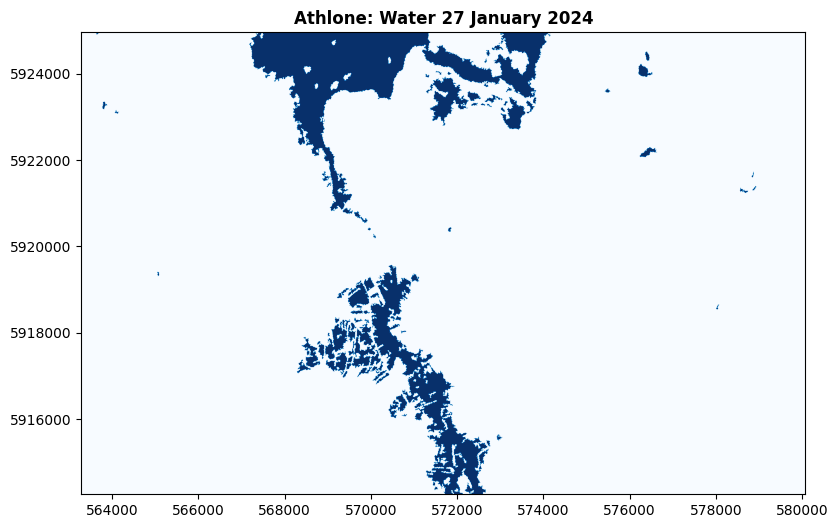

In [8]:
water_Athlone_2024_01_27_sieved = sieve(water_Athlone_2024_01_27.astype(np.int32), 25)

# The sieve method only works on integer data, due to the floating point arithmetic problem - see the Data Types notebook
# That's why the "astype(np.int32)" is in this line to convert the float data to integers before running the sieve
# Numpy integer arrays don't support "np.nan" no data values, so these are replaced with the lowest value possible
# So, we need to replace all pixels with that value to be zero

water_Athlone_2024_01_27_sieved[water_Athlone_2024_01_27_sieved==-2147483648]=0 

# Now we can plot the data

fig, ax = plt.subplots(figsize=(10, 6))

show(water_Athlone_2024_01_27_sieved, transform=SAR_Athlone_2024_01_27.transform, ax=ax, title='Athlone: Water 27 January 2024', cmap="Blues")

ax.ticklabel_format(style='plain')
plt.show()

Much cleaner. Let's resave and plot this as a vector:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


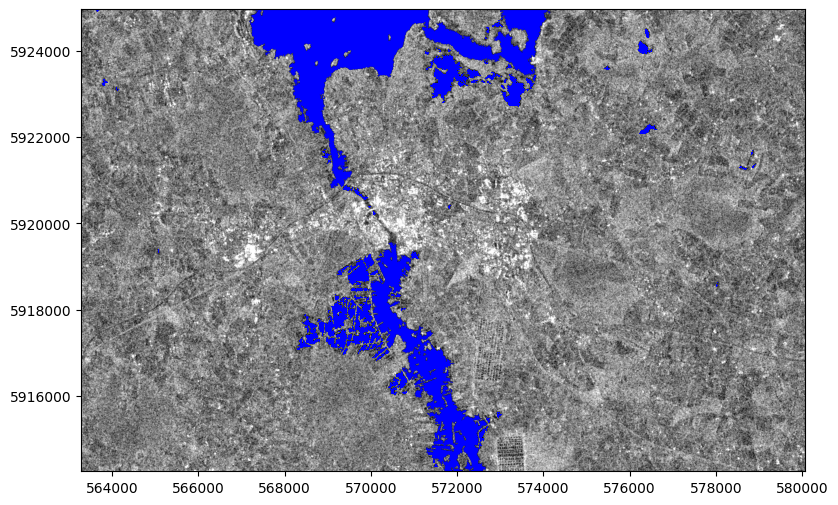

In [9]:
with rio.open('./sample_data/2024-01-27-18_23_Sentinel-1_water_raster_sieved.tif', 'w', **water_meta) as dst:
    dst.write(water_Athlone_2024_01_27_sieved, 1)
    dst.set_band_description(1, 'water')

water_2024_01_27_raster_sieved = rio.open('./sample_data/2024-01-27-18_23_Sentinel-1_water_raster_sieved.tif')
water_2024_01_27_vector_sieved = dataset_features(water_2024_01_27_raster_sieved, bidx=1, band=True, as_mask=False, with_nodata=False, geographic=False)
water_2024_01_27_df_vector_sieved = gpd.GeoDataFrame.from_features(water_2024_01_27_vector_sieved,crs=32629)
water_2024_01_27_df_vector_sieved = water_2024_01_27_df_vector_sieved[water_2024_01_27_df_vector_sieved['val']==1]
water_2024_01_27_df_vector_sieved = water_2024_01_27_df_vector_sieved.drop(columns=['val', 'filename'])
water_2024_01_27_df_vector_sieved['Water 27 January 2024']=True
water_2024_01_27_df_vector_sieved.to_file('./sample_data/2024-01-27-18_23_Sentinel-1_water_vector_sieved.gpkg')

fig, ax = plt.subplots(figsize=(10, 6))

show(SAR_Athlone_2024_01_27, ax=ax, cmap="Greys")

water_2024_01_27_df_vector_sieved.plot(ax=ax, color='Blue')

ax.ticklabel_format(style='plain')
plt.show()

Much cleaner!

## 2. Temporal Change with SAR

So, I can hear you thinking "That's nice, but I can get a map of water features as a vector elsewhere, why would I do this?"

Of course, you can find maps of rivers and lakes - I already gave you links to EPA vector data for the rivers and lakes in Ireland. However, remember that the surface of the Earth isn't static. In this instance, remember in particular that sometimes, areas which are usually solid ground get temporaily covered in water; i.e., flooding happens.

Sentinel 1 isn't a single satellite - or at least, it isn't always. Sentinel-1A was launched in April 2014, and was followed by Sentinel-1B in April 2016. Unfortunately, Sentinel-1B failed in December 2021, but Sentinel-1C is ready and waiting for launch later this year, with Sentinel-1D to follow next year.

The Sentinel 1 satellites have a return period of 12 days - meaning they will image almost exactly the same area at almost exactly the same time of day from almost exactly the same position every 12 days. Some areas will be captured more than once in that period, due to the overlaps between images of adjacent areas. This means we can compare images at least every 12 days for the past 9 years.

So, let's compare. The data above was collected at 18:23 on 27 January 2024. Below, let's look at the same area as seen at 18:23 on 13 June 2023. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


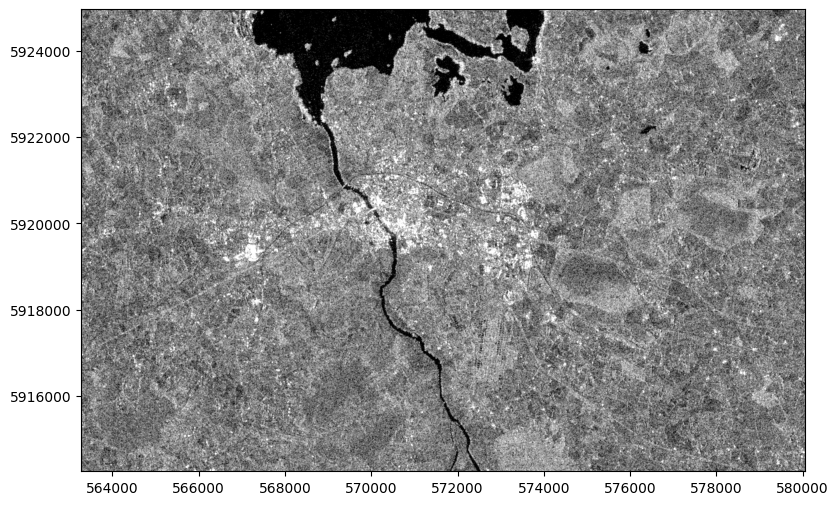

In [10]:
SAR_Athlone_2023_06_13 = rio.open('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/3_Spatial_and_Temporal_Change/sample_data/athlone/2023-06-13-18_23_Sentinel-1_IW_VV_decibel_gamma0.tiff')

fig, ax = plt.subplots(figsize=(10, 6))
ax.ticklabel_format(style='plain')
show(SAR_Athlone_2023_06_13, ax=ax, cmap="Greys")
plt.show()

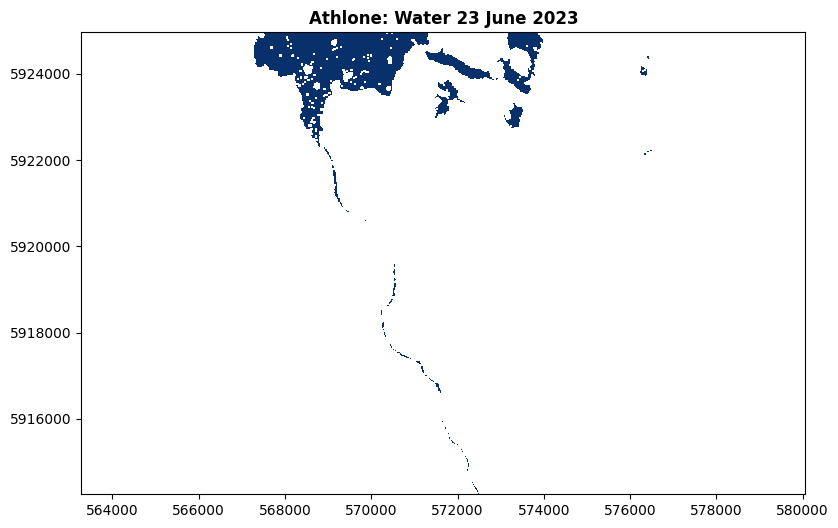

In [11]:
water_Athlone_2023_06_13 = SAR_Athlone_2023_06_13.read(1)
water_Athlone_2023_06_13[water_Athlone_2023_06_13>threshold]=np.nan
water_Athlone_2023_06_13[water_Athlone_2023_06_13<threshold]=1

fig, ax = plt.subplots(figsize=(10, 6))

show(water_Athlone_2023_06_13, transform=SAR_Athlone_2023_06_13.transform, ax=ax, title='Athlone: Water 23 June 2023', cmap="Blues_r")

ax.ticklabel_format(style='plain')
plt.show()

/tmp/ipykernel_12665/3010867386.py:1: RuntimeWarning: invalid value encountered in cast
  water_Athlone_2023_06_13_sieved = sieve(water_Athlone_2023_06_13.astype(np.int32), 25)


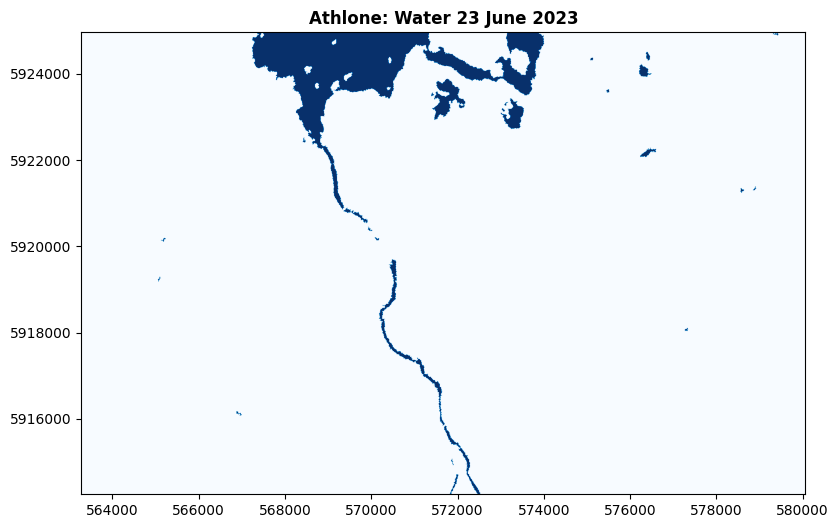

In [12]:
water_Athlone_2023_06_13_sieved = sieve(water_Athlone_2023_06_13.astype(np.int32), 25)
water_Athlone_2023_06_13_sieved[water_Athlone_2023_06_13_sieved==-2147483648]=0 

fig, ax = plt.subplots(figsize=(10, 6))

show(water_Athlone_2023_06_13_sieved, transform=SAR_Athlone_2023_06_13.transform, ax=ax, title='Athlone: Water 23 June 2023', cmap="Blues")

ax.ticklabel_format(style='plain')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


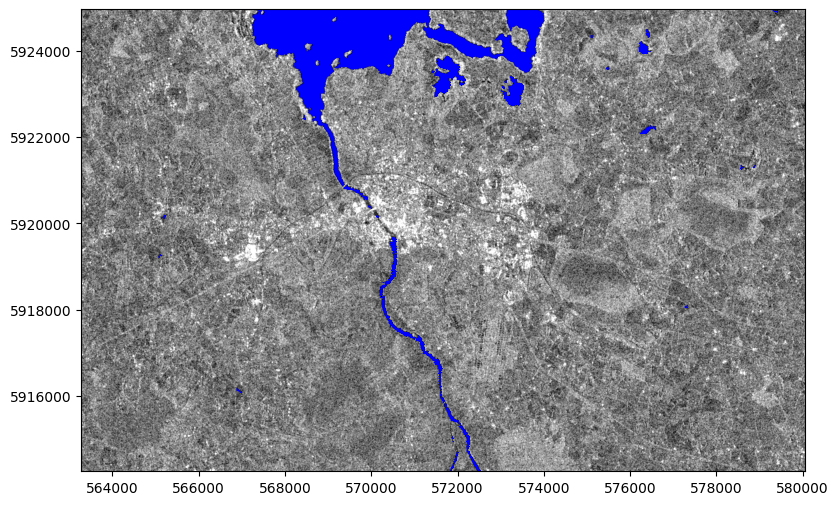

In [13]:
with rio.open('./sample_data/water_Athlone_2023_06_13_sieved.tif', 'w', **water_meta) as dst:
    dst.write(water_Athlone_2023_06_13_sieved, 1)
    dst.set_band_description(1, 'water')

water_2023_06_13_raster_sieved = rio.open('./sample_data/water_Athlone_2023_06_13_sieved.tif')
water_2023_06_13_vector_sieved = dataset_features(water_2023_06_13_raster_sieved, bidx=1, band=True, as_mask=False, with_nodata=False, geographic=False)
water_2023_06_13_df_vector_sieved = gpd.GeoDataFrame.from_features(water_2023_06_13_vector_sieved,crs=32629)
water_2023_06_13_df_vector_sieved = water_2023_06_13_df_vector_sieved[water_2023_06_13_df_vector_sieved['val']==1]
water_2023_06_13_df_vector_sieved = water_2023_06_13_df_vector_sieved.drop(columns=['val', 'filename'])
water_2023_06_13_df_vector_sieved['Water 13 June 2023']=True
water_2023_06_13_df_vector_sieved.to_file('./sample_data/2023-06-13-18_23_Sentinel-1_water_vector_sieved.gpkg')

fig, ax = plt.subplots(figsize=(10, 6))

show(SAR_Athlone_2023_06_13, ax=ax, cmap="Greys")

water_2023_06_13_df_vector_sieved.plot(ax=ax, color='Blue')

ax.ticklabel_format(style='plain')
plt.show()

Do you see the differences? It might help to compare them side by side:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


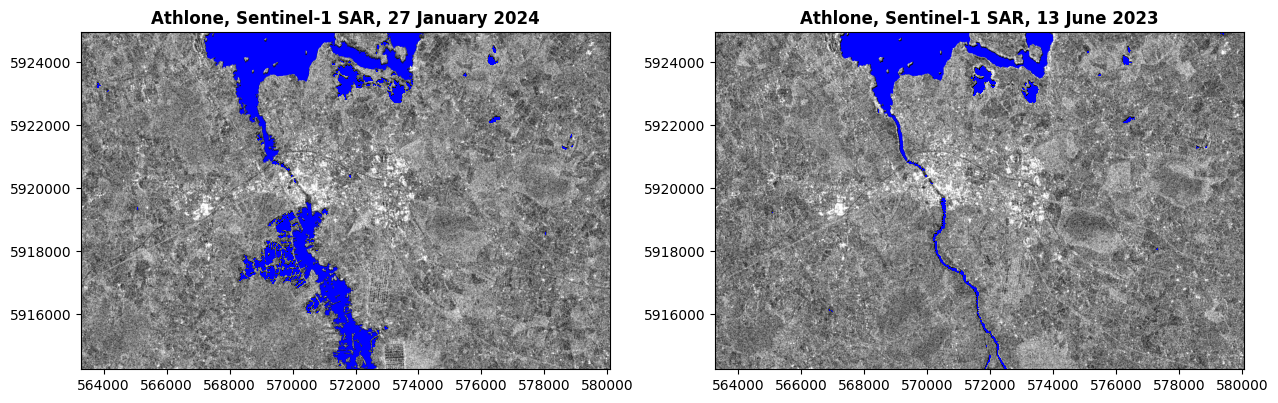

In [14]:
fig, (axJan24, axJun23) = plt.subplots(1,2, figsize=(15,11))

show(SAR_Athlone_2024_01_27, ax=axJan24, cmap="Greys", title="Athlone, Sentinel-1 SAR, 27 January 2024")
water_2024_01_27_df_vector_sieved.plot(ax=axJan24, color='Blue')
axJan24.ticklabel_format(style='plain')

show(SAR_Athlone_2023_06_13, ax=axJun23, cmap="Greys", title="Athlone, Sentinel-1 SAR, 13 June 2023")
water_2023_06_13_df_vector_sieved.plot(ax=axJun23, color='Blue')
axJun23.ticklabel_format(style='plain')

plt.show()

That's quite a difference. Of course, it might be even *more* helpful if we could show the change on a single map.

Which we can, by simply subtracting the rasters pixel values. However, to do so, we first need to make sure the images are lined up, so that they have exactly the same pixel size and boundaries.

## 3. Raster Calculations

Sentinel-1A's orbit is very precisely calibrated, but it's impossible to be exactly precise. Plus, this isn't the entire collected image - I downloaded these from the Copernicus Browser.  

In [15]:
SAR_Athlone_2023_06_13.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1679,
 'height': 1071,
 'count': 3,
 'crs': CRS.from_epsg(32629),
 'transform': Affine(9.998439504466967, 0.0, 563278.254611,
        0.0, -10.001484077496857, 5924964.917167)}

In [16]:
SAR_Athlone_2024_01_27.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1679,
 'height': 1071,
 'count': 3,
 'crs': CRS.from_epsg(32629),
 'transform': Affine(9.99843934246579, 0.0, 563289.674728,
        0.0, -10.001521598505956, 5924965.109526)}

They have exactly the same attributes, exept for the transform - which differs at the fifth or sixth significant figure for each coordinate. That's close, but not quite close enough: there's about a 1m difference to the north and south, and about an 11m difference to the east and west. The pixel resolution is about 10m per pixel, so doing a straight subtraction would be one pixel off in the east-west direction. This code shows the areas which are part of only one of the two images:

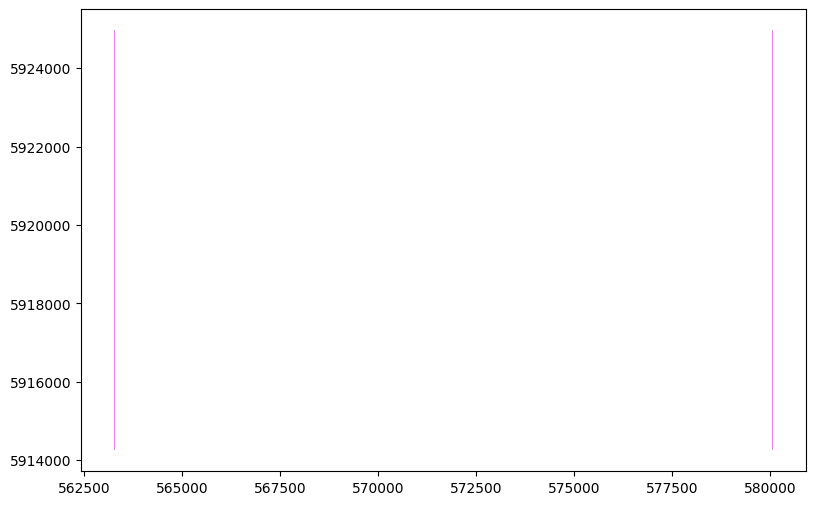

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

gpd.GeoDataFrame({"id":1,"geometry":[box(*SAR_Athlone_2023_06_13.bounds)]}).overlay(gpd.GeoDataFrame({"id":1,"geometry":[box(*SAR_Athlone_2024_01_27.bounds)]}), how='symmetric_difference').plot(ax=ax, color='violet')

ax.ticklabel_format(style='plain')
plt.show()

In the *Single Band Raster Data* notebook, we looked at coregistration of rasters with different extents and projections. There may be cases where that would be necessary.

However, in this case, we're not working from data downloaded from multiple different sources. Both of our datasets are of the same kind, from the same source, of the same area. Both are Sentinel-1A GRD images with exactly the same CRS and resolution. They're just slightly offset. So, this is a much simpler situation.

The easiest thing to do in this case is therefore to extract the geometry of the area which is covered by both images, and crop both of our images to that geometry before doing the calculations. 

We can do this by:

1. Extracting the geometry of the bounds of each image as a GeoDataFrame
2. Intersecting these bounds to create a GeoDataFrame of the shared area
3. Crop each of the images to the intersection.

We've done each of these steps before, at different times, on the multispectral imagery. Steps 1 and 2:

<Axes: >

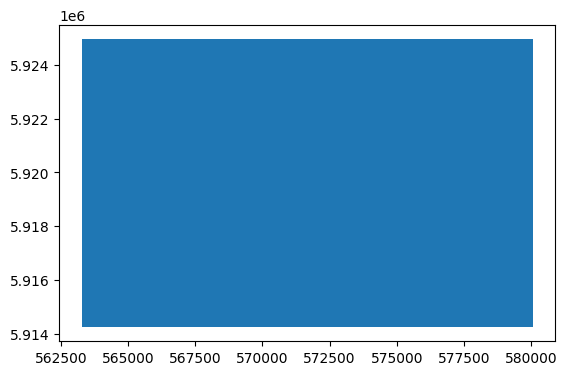

In [18]:
# step 1
jun23_bounds = gpd.GeoDataFrame({"id":1,"geometry":[box(*SAR_Athlone_2023_06_13.bounds)]})
jan24_bounds = gpd.GeoDataFrame({"id":1,"geometry":[box(*SAR_Athlone_2024_01_27.bounds)]})

# step 2
jan_jun_intersect = jun23_bounds.overlay(jan24_bounds, how='intersection')

# plot step 2
jan_jun_intersect.plot()

In [19]:
# step 3 for the january data

with rio.open('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/3_Spatial_and_Temporal_Change/sample_data/athlone/2024-01-27-18_23_Sentinel-1_IW_VV_decibel_gamma0.tiff') as jan_sar:
    jan24_crop_data, jan24_crop_transform = rio.mask.mask(jan_sar, jan_jun_intersect['geometry'], crop=True)
    jan24_crop_meta = jan_sar.meta
    jan24_crop_meta.update({"driver": "GTiff",
                     "height": jan24_crop_data.shape[1],
                     "width": jan24_crop_data.shape[2],
                     "transform": jan24_crop_transform})

# step 3 for the june data

with rio.open('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/3_Spatial_and_Temporal_Change/sample_data/athlone/2023-06-13-18_23_Sentinel-1_IW_VV_decibel_gamma0.tiff') as jun_sar:
    jun23_crop_data, jun23_crop_transform = rio.mask.mask(jun_sar, jan_jun_intersect['geometry'], crop=True)
    jun23_crop_meta = jun_sar.meta
    jun23_crop_meta.update({"driver": "GTiff",
                     "height": jun23_crop_data.shape[1],
                     "width": jun23_crop_data.shape[2],
                     "transform": jun23_crop_transform})

In [20]:
jun23_crop_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1678,
 'height': 1071,
 'count': 3,
 'crs': CRS.from_epsg(32629),
 'transform': Affine(9.998439504466967, 0.0, 563288.2530505044,
        0.0, -10.001484077496857, 5924964.917167)}

In [21]:
jan24_crop_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1678,
 'height': 1071,
 'count': 3,
 'crs': CRS.from_epsg(32629),
 'transform': Affine(9.99843934246579, 0.0, 563289.674728,
        0.0, -10.001521598505956, 5924965.109526)}

They're still not precisely identical - but the offset is now around 1m, which is far lower that the size of the pixels. So, for the purposes of comparison, they're *effectively* identical. 

Comparison is then as simple as subtracting the two arrays:

In [22]:
jan23_jun24_change = jun23_crop_data-jan24_crop_data

We can plot this on a map:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


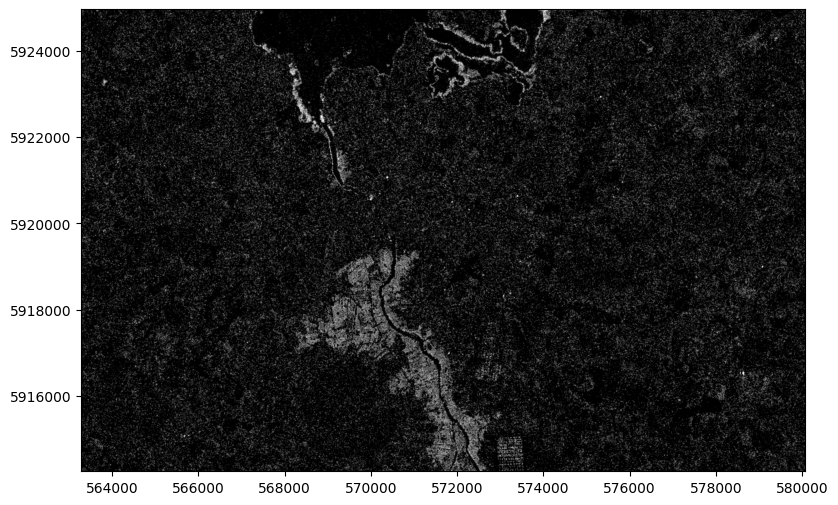

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

show(jan23_jun24_change, transform=jun23_crop_transform, ax=ax, cmap="Greys")

ax.ticklabel_format(style='plain')
plt.show()

Areas in darker shades are areas where the values were similar in both images - so subtracting one from the other leaves a result near zero.

The brighter areas are where there was a higher value in June 2023 (because it was solid ground) and a lower value in January 2024 (because it was covered in water), leaving a result which is close to the original value from June 2023. 

As we did for the separate images, we could threshold and sieve this:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


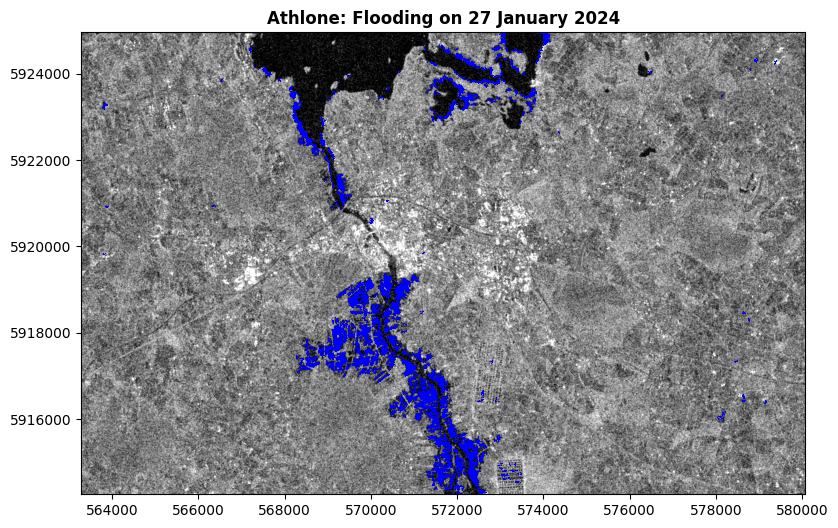

In [24]:
flood_threshold = 0.3
jan24_flood = jun23_crop_data-jan24_crop_data
jan24_flood[jan24_flood>flood_threshold]=1
jan24_flood[jan24_flood<flood_threshold]=0

jan24_flood_sieved = sieve(jan24_flood.astype(np.int32), 25)

with rio.open('./sample_data/Athlone_jan24_flood_sieved.tif', 'w', **jun23_crop_meta) as dst:
    dst.write(jan24_flood_sieved)

jan24_flood_sieved_raster = rio.open('./sample_data/Athlone_jan24_flood_sieved.tif')
jan24_flood_sieved_vector = dataset_features(jan24_flood_sieved_raster, bidx=1, band=True, as_mask=False, with_nodata=False, geographic=False)
jan24_flood_sieved_df_vector = gpd.GeoDataFrame.from_features(jan24_flood_sieved_vector,crs=32629)
jan24_flood_sieved_df_vector = jan24_flood_sieved_df_vector[jan24_flood_sieved_df_vector['val']==1]
jan24_flood_sieved_df_vector = jan24_flood_sieved_df_vector.drop(columns=['val', 'filename'])
jan24_flood_sieved_df_vector['Flooded 27 Jan 2024']=True
jan24_flood_sieved_df_vector.to_file('./sample_data/2024-01-27-18_23_Sentinel-1_flood_sieved.gpkg')

fig, ax = plt.subplots(figsize=(10, 6))

show(jan24_crop_data, transform=jan24_crop_transform, ax=ax, title='Athlone: Flooding on 27 January 2024', cmap="Greys")
jan24_flood_sieved_df_vector.plot(ax=ax, color='Blue')

ax.ticklabel_format(style='plain')
plt.show()

So, we've compared satellite radar data from two different dates to produce a vector map of flooded areas.

Of course, we can bring in data from as many different dates as we like. So here, I've brought in data from a third date, March 2020. I've also brought in thet roads in the area, coloured them by category, and highlighted parts of roads which overlap with flooded areas in red:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_12665/1204398526.py:67: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  athlone_R_roads_f.plot(ax=ax, color='orangered', linewidth=4)
/tmp/ipykernel_12665/1204398526.py:69: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  athlone_M_roads_f.plot(ax=ax, color='orangered', linewidth=4)


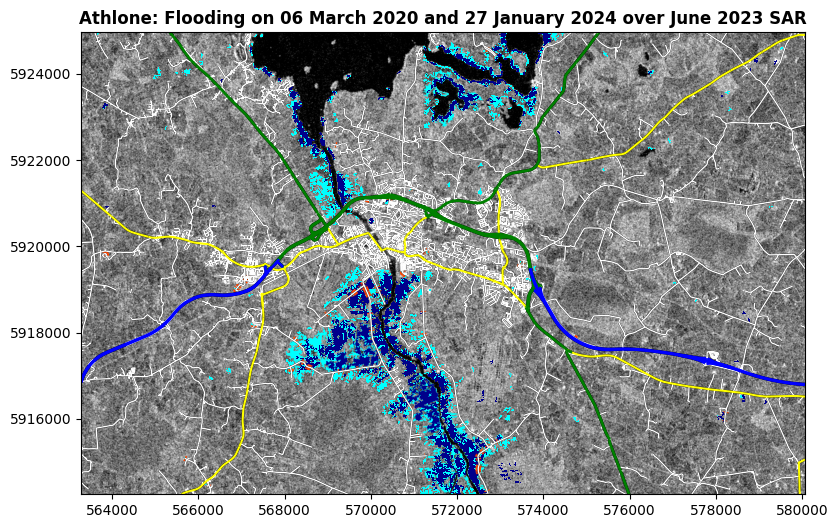

In [27]:
# open March 2020 data and crop to the same geometry as the 2023 and 2024 maps

with rio.open('https://github.com/bamacgabhann/GY5021/raw/2024/GY5021/3_Spatial_and_Temporal_Change/sample_data/athlone/2020-03-06-18_22_Sentinel-1_IW_VV_decibel_gamma0.tiff') as SAR_Athlone_2020_03_06:
    mar20_crop_data, mar20_crop_transform = rio.mask.mask(SAR_Athlone_2020_03_06, jan_jun_intersect['geometry'], crop=True)
    mar20_crop_meta = SAR_Athlone_2020_03_06.meta
    mar20_crop_meta.update({"driver": "GTiff",
                     "height": mar20_crop_data.shape[1],
                     "width": mar20_crop_data.shape[2],
                     "transform": mar20_crop_transform})

# threshold and sieve the March 2020 data in the same way as the January 2024 data

flood_threshold = 0.3
mar20_flood = jun23_crop_data-mar20_crop_data
mar20_flood[mar20_flood>flood_threshold]=1
mar20_flood[mar20_flood<flood_threshold]=0

mar20_flood_sieved = sieve(mar20_flood.astype(np.int32), 25)

# Saving the sieved raster, and create a vector GeoDataFrame of the March 2020 floods, saving this as a geopackage

with rio.open('./sample_data/Athlone_mar20_flood_sieved.tif', 'w', **mar20_crop_meta) as dst:
    dst.write(mar20_flood_sieved)

mar20_flood_sieved_raster = rio.open('./sample_data/Athlone_mar20_flood_sieved.tif')
mar20_flood_sieved_vector = dataset_features(mar20_flood_sieved_raster, bidx=1, band=True, as_mask=False, with_nodata=False, geographic=False)
mar20_flood_sieved_df_vector = gpd.GeoDataFrame.from_features(mar20_flood_sieved_vector,crs=32629)
mar20_flood_sieved_df_vector = mar20_flood_sieved_df_vector[mar20_flood_sieved_df_vector['val']==1]
mar20_flood_sieved_df_vector = mar20_flood_sieved_df_vector.drop(columns=['val', 'filename'])
mar20_flood_sieved_df_vector['Flooded 06 March 2020']=True
mar20_flood_sieved_df_vector.to_file('./sample_data/2020-03-06-18_22_Sentinel-1_flood_sieved.gpkg')

# download the motorway, national, secondary, and local roads from OpenStreetMap in the area, cropping them to the map area

athlone_M_roads = ox.features_from_polygon(jan_jun_intersect.set_crs(32629).to_crs(4326)['geometry'][0], tags={'highway': ['motorway_link', 'motorway']}).to_crs(32629).overlay(jan_jun_intersect.set_crs(32629), how='intersection')
athlone_N_roads = ox.features_from_polygon(jan_jun_intersect.set_crs(32629).to_crs(4326)['geometry'][0], tags={'highway': ['trunk','trunk_link','primary','primary_link']}).to_crs(32629).overlay(jan_jun_intersect.set_crs(32629), how='intersection')
athlone_R_roads = ox.features_from_polygon(jan_jun_intersect.set_crs(32629).to_crs(4326)['geometry'][0], tags={'highway': ['secondary','secondary_link']}).to_crs(32629).overlay(jan_jun_intersect.set_crs(32629), how='intersection')
athlone_L_roads = ox.features_from_polygon(jan_jun_intersect.set_crs(32629).to_crs(4326)['geometry'][0], tags={'highway': ['tertiary','unclassified','residential','service', 'tertiary_link']}).to_crs(32629).overlay(jan_jun_intersect.set_crs(32629), how='intersection')

# intersect the floods from March 2020 and January 2024 to create a vector of areas flooded on either date

allflood = mar20_flood_sieved_df_vector.overlay(jan24_flood_sieved_df_vector, how='union')

# intersect the roads with this flood vector to isolate roads flooded on either date

athlone_L_roads_f = athlone_L_roads.overlay(allflood, how='intersection')
athlone_R_roads_f = athlone_R_roads.overlay(allflood, how='intersection')
athlone_N_roads_f = athlone_N_roads.overlay(allflood, how='intersection')
athlone_M_roads_f = athlone_M_roads.overlay(allflood, how='intersection')

# plot

fig, ax = plt.subplots(figsize=(10, 6))

# show the June 2023 SAR data as the base map

show(jun23_crop_data, transform=jun23_crop_transform, ax=ax, title='Athlone: Flooding on 06 March 2020 and 27 January 2024 over June 2023 SAR', cmap="Greys")

# show the March 2020 and January 2024 floods in different shades of blue

mar20_flood_sieved_df_vector.plot(ax=ax, color='cyan')
jan24_flood_sieved_df_vector.plot(ax=ax, color='darkblue')

# plot the flooded road areas as thick red lines

athlone_L_roads_f.plot(ax=ax, color='orangered', linewidth=4)
athlone_R_roads_f.plot(ax=ax, color='orangered', linewidth=4)
athlone_N_roads_f.plot(ax=ax, color='orangered', linewidth=4)
athlone_M_roads_f.plot(ax=ax, color='orangered', linewidth=4)

# plot all roads with a thicker black line which will show as edges,
# and a main line coloured by category

athlone_L_roads.plot(ax=ax, color='black', linewidth=1.2)
athlone_R_roads.plot(ax=ax, color='black', linewidth=1.7)
athlone_N_roads.plot(ax=ax, color='black', linewidth=2.2)
athlone_M_roads.plot(ax=ax, color='black', linewidth=2.2)
athlone_L_roads.plot(ax=ax, color='white', linewidth=1)
athlone_R_roads.plot(ax=ax, color='yellow', linewidth=1.5)
athlone_N_roads.plot(ax=ax, color='green', linewidth=2)
athlone_M_roads.plot(ax=ax, color='Blue', linewidth=2)

# show the coordinates on the frame in plain style

ax.ticklabel_format(style='plain')
plt.show()

## Summary

I wanted to show you SAR data because it's an extremely powerful tool for identifying flooding, which is a growing climate hazard. I particularly wanted to use it as the example for multi-temporal data because SAR is most powerful at identifying flooding when comparing imagery from different dates.

It's also excellent at identifying changes in the ground surface, and you may have seen some SAR data processed to highlight land surface changes associated with the ongoing volcanic eruptions in Iceland, e.g. (click on the image for the source page, with other info and data):

<a href="https://en.vedur.is/about-imo/news/a-seismic-swarm-started-north-of-grindavik-last-night"><img src="https://en.vedur.is/media/uncategorized/medium/bylgjuvixlmynd-09022024.png" alt="Satellite radar image taken at 14:56 on 08 February shows surface subsidence of 10 cm in Svartsengi area, north-west of mt. Þorbjörn, when magma flowed from there towards Sundhnúkur crater row. Model calculations based on these data suggest that about 10 million m3 of magma has flowed from the magma reservoir beneath Svartsengi towards the eruption site at Sundhnúkur crater row."></a>

Doesn't have to be volcanoes or earthquakes - landslides are a hazard in many parts of Ireland, and can be identified with SAR imagery.

Of course, SAR is *far* from the only source of multitemporal data. 

Sentinel 2 multispectral imagery is available for the last 8 years, and anything you can look at with that, you can look at change in it by examining imagery from different dates. Land use change, forestry growth, changes in biodiversity, agriculture, water quality, snow and ice cover... it's a long list.

There's other sources of satellite imagery, such as LANDSAT, which can be compared as well.

Not is it limited to raster data - and in the next Notebook, we'll look at census data change through time.

___

Week 3 Notebooks: 

11. Temporal Change: Active Remote Sensing <a href="https://colab.research.google.com/github/bamacgabhann/GY5021/blob/2024/GY5021/3_Spatial_and_Temporal_Change/GY5021_11_Temporal_Change-Active_Remote_Sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>     <a href="https://mybinder.org/v2/gh/bamacgabhann/GY5021/9a706c8973d5bde0e50593ecc94941b0426f24a6?urlpath=lab%2Ftree%2FGY5021%2F3_Spatial_and_Temporal_Change%2FGY5021_11_Temporal_Change-Active_Remote_Sensing.ipynb" target="_parent"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder" /></a>

12. Census Data Through Time  *(coming soon)*

13. Moving Objects  *(coming soon)*